- read product (phone) and review data from mySQL database using peewee model
- remove 'id' column, drop duplicate entries due if script was run multiple times
- There are 30362 reviews

In [50]:
from db import *
import pandas as pd
review = Review()
product = Product()

review_records = review.select()
product_records = product.select()

review_df = pd.DataFrame(list(review_records.dicts())).drop(columns='id')
print(review_df.shape)
print(review_df.head())
product_df = pd.DataFrame(list(product_records.dicts())).drop(columns='id').drop_duplicates()
print(product_df.head())
print(product_df.shape)

(30362, 10)
       date_published  helpful  rating recommending      skuId    store  \
0 2019-01-18 08:58:08     8967       5         True  MT6F2LL/A  verizon   
1 2019-02-17 08:58:08     1354       5         True  MT6F2LL/A  verizon   
2 2019-01-18 08:58:08     1044       5         True  MT6F2LL/A  verizon   
3 2019-02-17 08:58:08      363       5         True  MT6F2LL/A  verizon   
4 2018-12-19 08:58:08      672       5         True  MT6F2LL/A  verizon   

                                                                                                                                                                                                      text  \
0  I'm coming from the iPhone X. The XS Max is much faster! I was worried about the size but due to I've never had any of the plus iPhones. It didn't take my long to get used to it! It does fit great...   
1  Loving the new iPhone XS Max so far. The screen is amazing, sound is awesome and the camera is out of this world. Battery 

In [51]:
pd.set_option('display.max_columns',20)
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,6)

plt.scatter
print(review_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30362 entries, 0 to 30361
Data columns (total 10 columns):
date_published    30362 non-null datetime64[ns]
helpful           30362 non-null int64
rating            30362 non-null int64
recommending      30362 non-null object
skuId             30362 non-null object
store             30362 non-null object
text              30362 non-null object
title             30362 non-null object
unhelpful         30362 non-null int64
username          30362 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.3+ MB
None


In [52]:
print(product_df.columns)


Index(['brand', 'color', 'price', 'product_name', 'skuId', 'spec_name',
       'spec_value', 'storage', 'store'],
      dtype='object')


- trim phone model name to 20 characters
- average phone price per model

In [53]:
product_df['product_name']=product_df['product_name'].apply(lambda x: x[:20].strip())
avg_price= product_df.groupby('product_name')['price'].mean().sort_values(ascending=False)
print(avg_price.shape)
avg_price

(40,)


product_name
RED HYDROGEN One        1295.000000
Apple iPhone XS Max     1266.656667
Apple iPhone XS         1166.656667
Samsung Galaxy Note9    1124.990000
Samsung Galaxy S10      1024.990000
Samsung Galaxy S10+      999.990000
Google Pixel 3 XL        979.990000
LG V40 ThinQ™            979.990000
Apple iPhone X           974.990000
Google Pixel 2 XL        899.990000
Google Pixel 3           849.990000
LG G8 ThinQ™             840.000000
Apple iPhone XR          816.656667
Samsung Galaxy S10e      799.990000
LG G7 ThinQ™             750.000000
Apple iPhone 8 Plus      707.323333
Samsung Galaxy S9+       699.990000
Apple iPhone 8           674.990000
Apple iPhone X (Cert     622.990000
Apple iPhone 7 Plus      614.660000
Samsung Galaxy S9        599.990000
Samsung Galaxy S8        499.990000
Apple iPhone 6s Plus     499.990000
Apple iPhone 7           499.990000
Motorola moto z3         480.000000
Apple iPhone 8 (Cert     473.990000
Kyocera DuraForce PR     444.000000
Apple iPhone 6s

Text(0, 0.5, 'Price')

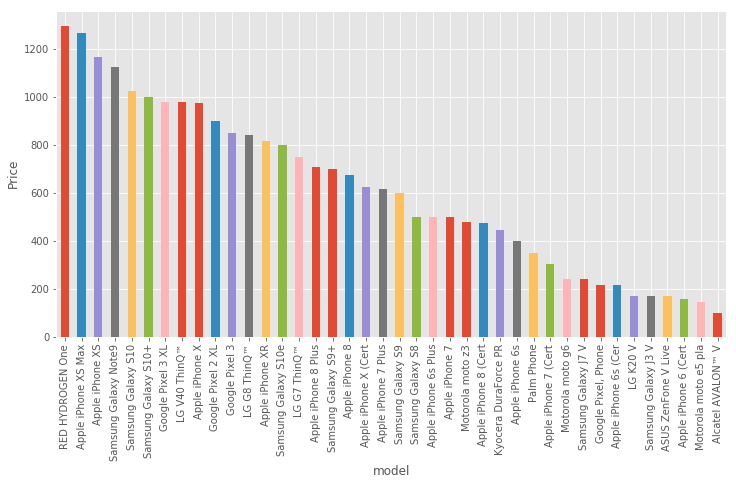

In [54]:
avg_price.plot.bar()
plt.xlabel('model')
plt.ylabel('Price')

- creat a df contains all review columns, product_name and average price from product table
- convert 'recommending' to boolean type, fill '' with 0
- filter out models with less than 10 reviews

In [55]:
product=product_df[['skuId','product_name']].drop_duplicates()
print(product.shape)
print(review_df[['skuId']].drop_duplicates().shape)
df = review_df.merge(product, how='inner', on='skuId')
df =df.merge(
    avg_price.reset_index(), how='inner', on='product_name').groupby(
    'skuId').filter(lambda x: x.shape[0]>10)

print(df.shape, review_df.shape)

df['recommending']=df.recommending.apply(lambda x: 1 if x=='True' else 0)




(42, 2)
(36, 1)
(30334, 12) (30362, 10)


- phones with high review numbers tend to be more popular

In [56]:
popular = df['product_name'].value_counts()

popular

Apple iPhone 6s         8767
Apple iPhone 7          6573
Apple iPhone 7 Plus     5810
Apple iPhone 6s Plus    5584
LG G7 ThinQ™             682
Samsung Galaxy S8        392
LG V40 ThinQ™            361
Motorola moto g6         235
Motorola moto z3         200
Google Pixel 2 XL        188
Apple iPhone X           179
Samsung Galaxy Note9     134
LG K20 V                 117
Apple iPhone 8 Plus      103
Samsung Galaxy J7 V      100
Samsung Galaxy J3 V       94
Samsung Galaxy S9+        93
Google Pixel 3            89
Apple iPhone XR           86
Apple iPhone XS Max       83
Google Pixel 3 XL         80
Samsung Galaxy S9         75
Samsung Galaxy S10+       60
ASUS ZenFone V Live       53
Apple iPhone 8            49
Apple iPhone XS           45
Samsung Galaxy S10        40
Kyocera DuraForce PR      28
Samsung Galaxy S10e       23
RED HYDROGEN One          11
Name: product_name, dtype: int64

Text(0, 0.5, 'reviews')

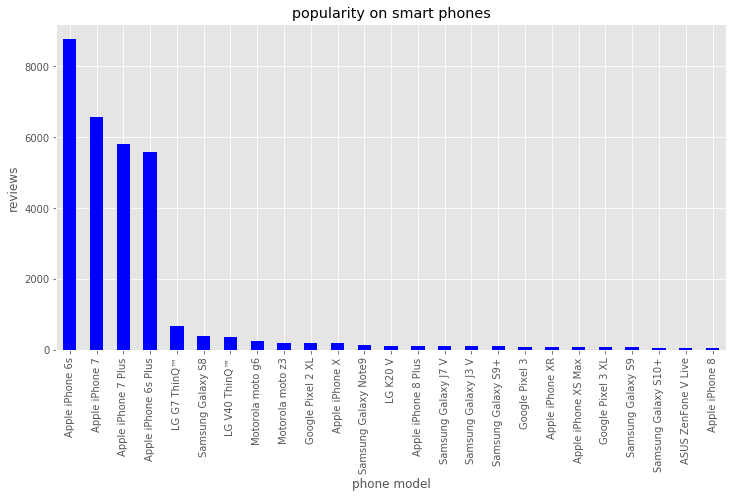

In [57]:

popular[:25].plot(kind='bar', title = 'popularity on smart phones', color='b')
plt.xlabel('phone model')
plt.ylabel('reviews')


In [58]:
df.describe()

,helpful,rating,recommending,unhelpful,price
count,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000
mean,12.698325,4.515692,0.829004,3.466308,516.805418
std,172.668914,0.869223,0.376512,30.081905,141.600994
min,0.000000,1.000000,0.000000,0.000000,168.000000
25%,0.000000,4.000000,1.000000,0.000000,399.990000
50%,0.000000,5.000000,1.000000,0.000000,499.990000
75%,0.000000,5.000000,1.000000,0.000000,614.660000
max,16155.000000,5.000000,1.000000,3973.000000,1295.000000


Text(0.5, 1.0, 'Buy Recommendations Based on Reviews')

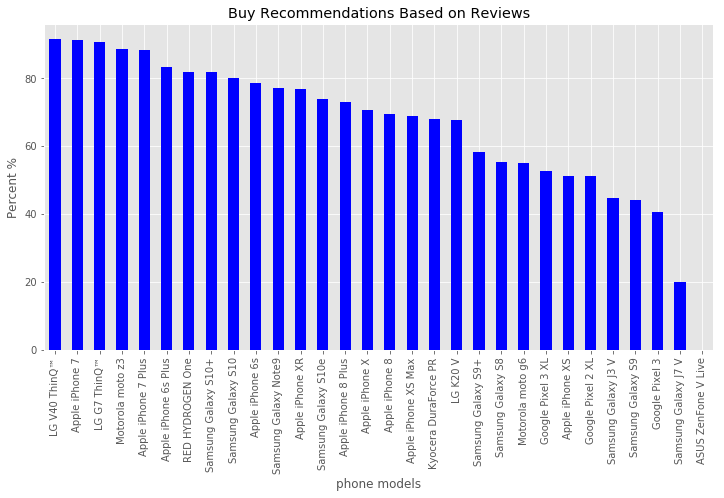

In [59]:
gp = df.groupby('product_name')
pct_recommend = gp['recommending'].apply(lambda x: sum(x ==1)/len(x)*100)
#pct_recommend = new_df['recommending'].apply(lambda x: sum(x =='True')/len(x)*100)
pct_recommend.sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('phone models') 
plt.ylabel('Percent %')
plt.title('Buy Recommendations Based on Reviews')




Text(0.5, 0, 'phone models')

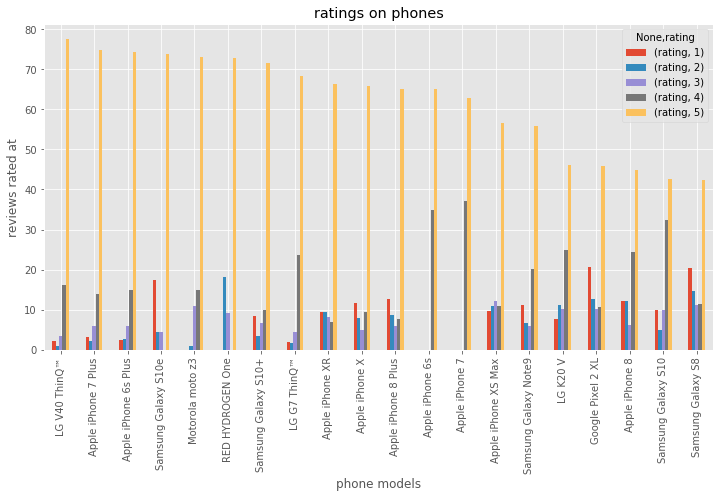

In [60]:

df1 = pd.DataFrame(df.groupby('product_name')['rating'].value_counts())

#df1.columns=['review_ratings']
data = df1.unstack()
total = data.apply('sum',axis = 1)
#index_plt = total.index[:30]
data_pct = data.apply(lambda x: x/total * 100).sort_values(by=('rating',5), ascending=False).fillna(0)[:20]
data_pct.plot.bar()

plt.title('ratings on phones')
plt.ylabel('reviews rated at')
plt.xlabel('phone models')


In [61]:
import numpy as np
price_review_grp=df.groupby('product_name')
review_cnt = price_review_grp['rating'].count()
price_review_df=price_review_grp.agg({'price':'max', 'rating':'mean'})
price_review_df['reviews']=review_cnt
print(price_review_df.shape)
print(price_review_df.info())
price_review_df.describe()


(30, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, ASUS ZenFone V Live to Samsung Galaxy S9+
Data columns (total 3 columns):
price      30 non-null float64
rating     30 non-null float64
reviews    30 non-null int64
dtypes: float64(2), int64(1)
memory usage: 960.0+ bytes
None


,price,rating,reviews
count,30.000000,30.000000,30.000000
mean,701.159778,3.743543,1011.133333
std,332.403992,0.823921,2314.568653
min,168.000000,1.056604,11.000000
25%,484.997500,3.402041,63.750000
50%,703.656667,3.932380,97.000000
75%,978.740000,4.318182,226.250000
max,1295.000000,4.659280,8767.000000


- ratings related to price? Not really from this chart!

Text(0.5, 1.0, 'relation between price and average rating on smart phones')

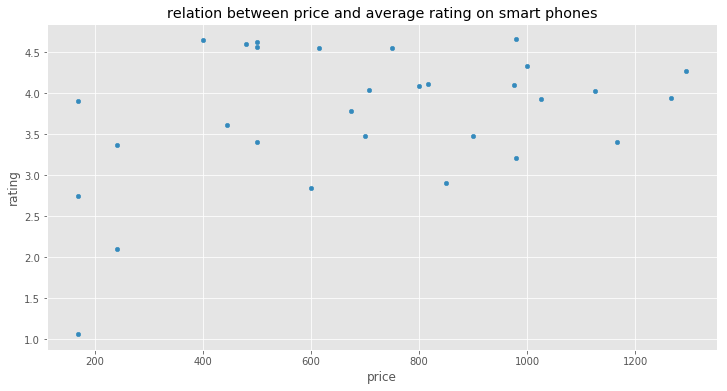

In [62]:
price_review_df.groupby('product_name').apply(np.mean,axis=0).plot.scatter(x='price',y='rating')
plt.title('relation between price and average rating on smart phones')

Text(0.5, 0, 'phone models')

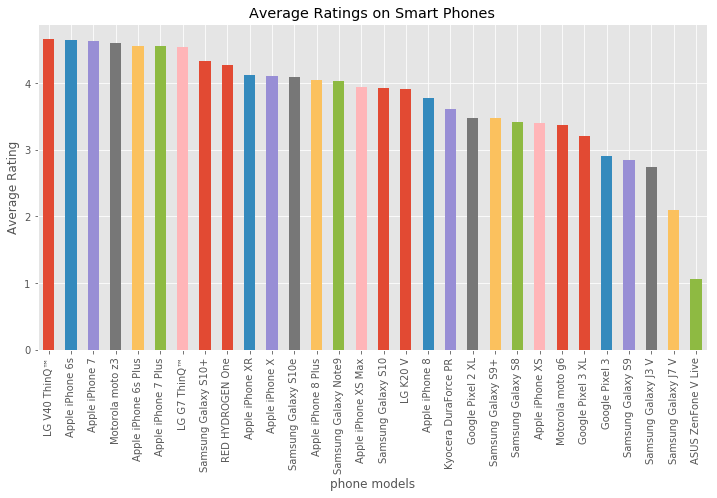

In [63]:
price_review_df['rating'].sort_values(ascending=False).plot.bar(title="Average Ratings on Smart Phones")
plt.ylabel('Average Rating')
plt.xlabel('phone models')



- ratings related to review numbers?

Text(0.5, 1.0, 'Relationship between number of reviews and average ratings')

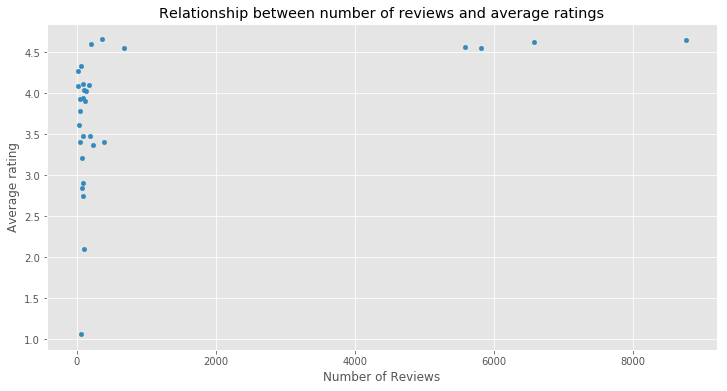

In [64]:
price_review_df.plot.scatter(y='rating', x='reviews')
plt.ylabel('Average rating')
plt.xlabel('Number of Reviews')
plt.title('Relationship between number of reviews and average ratings')

- review numbers related to price?

Text(0.5, 1.0, 'Relations between Price and Review Numbers')

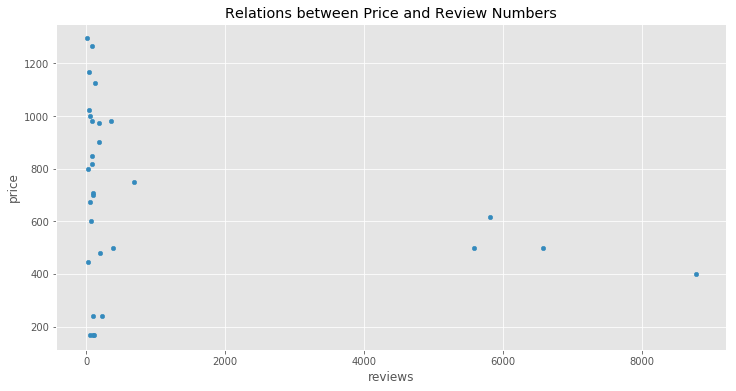

In [65]:
price_review_df.plot.scatter(x='reviews', y='price')
plt.title('Relations between Price and Review Numbers')

- NLP for review text

In [66]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

In [67]:
df1=df.copy()

- combine title into text

In [68]:
df1.columns
df1['text'] = df1['title'] + ' ' + df1['text'] 

- remove extra space

In [153]:
import re
pd.set_option('max_colwidth',200)
df1['text']=df1['text'].str.lower().apply(lambda x: re.sub('\s+', ' ', x))
#df1['text'].sample(10)

- remove punctuation, following line remove anything that is not word and space

In [70]:
df1['text']=df1['text'].apply(lambda x: re.sub('[^\w\s]','',x))

- use stop word set from library

In [151]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['iphone', '6s','plus'])
#stop.extend(['im', 'ive', 'iphone', 'x','xs', 'max', 'phone', 'due','still','phones'])
#print(stop)

In [141]:
df1['text']=df1['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

In [152]:
#df1['text'].sample(10)

### Word Cloud

In [143]:
from wordcloud import WordCloud

In [144]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df1['text']))

#### Word Cloud on total reviews of all phones, "great phone" rank the 1st 

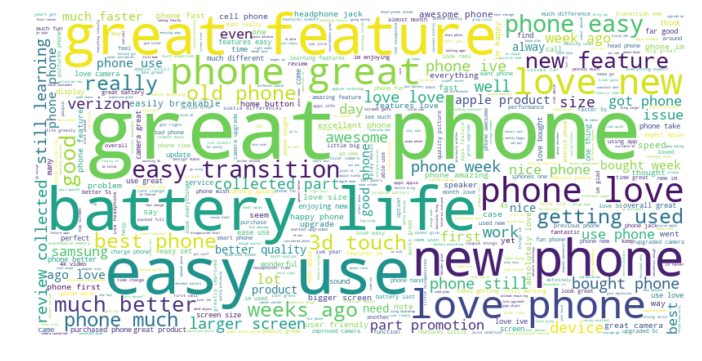

In [145]:
# show
#plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud on reviews for iPhone 6s


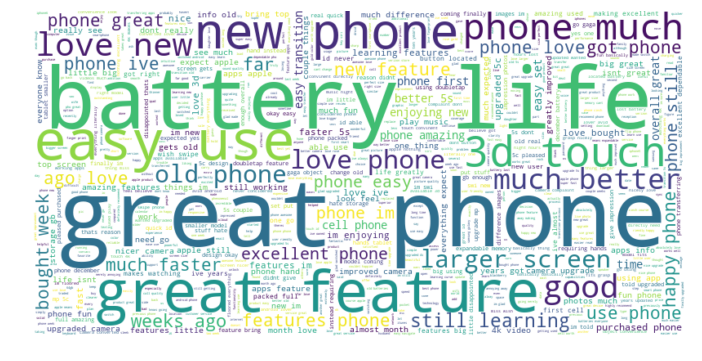

In [168]:
#wc_iphone6s = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
#Apple iPhone 6s         8767
#Apple iPhone 6s Plus    5584
mask = df1['product_name']=='Apple iPhone 6s'
iphone_6s = df1[mask]
wc.generate(' '.join(iphone_6s['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



### Word Cloud on reviews for iPhone 6s Plus

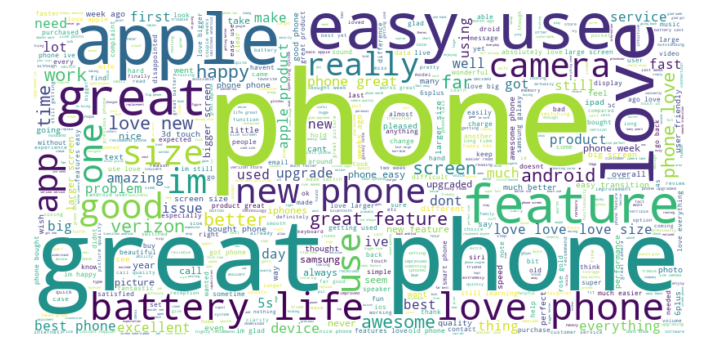

In [169]:
mask = df1['product_name']=='Apple iPhone 6s Plus'
iphone_6splus = df1[mask]
wc.generate(' '.join(iphone_6splus['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for iPhone 7

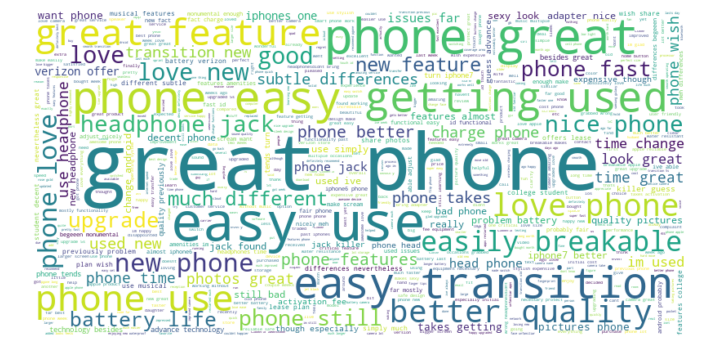

In [170]:
mask = df1['product_name']== 'Apple iPhone 7'
iphone_7 = df1[mask]
wc.generate(' '.join(iphone_7['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


### Word Cloud for iPhone 7 Plus

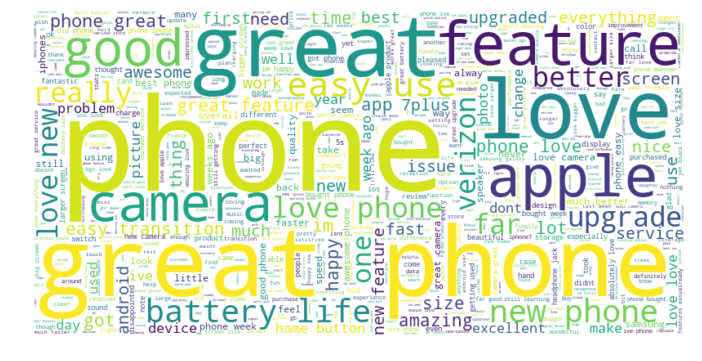

In [171]:
mask = df1['product_name']=='Apple iPhone 7 Plus'
iphone_7plus = df1[mask]
wc.generate(' '.join(iphone_7plus['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis for iPhone 6s, 6s plus, 7, 7 plus

In [172]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x



#### iPhone 6s

In [173]:
sample = iphone_6s.apply(sentiment_func, axis=1)
sample.describe()

,helpful,rating,recommending,unhelpful,price,polarity,subjectivity
count,8767.000000,8767.000000,8767.000000,8767.000000,8.767000e+03,8767.000000,8767.000000
mean,3.416220,4.650394,0.785674,0.600890,3.999900e+02,0.371420,0.598429
std,25.336238,0.476873,0.410378,3.160555,8.487206e-11,0.206472,0.157983
min,0.000000,4.000000,0.000000,0.000000,3.999900e+02,-1.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,3.999900e+02,0.263542,0.505602
50%,0.000000,5.000000,1.000000,0.000000,3.999900e+02,0.357143,0.600649
75%,0.000000,5.000000,1.000000,0.000000,3.999900e+02,0.500000,0.677778
max,1845.000000,5.000000,1.000000,86.000000,3.999900e+02,1.000000,1.000000


Text(0.5, 1.0, 'Relation between Polarity and log of helpful votes on Reviews ')

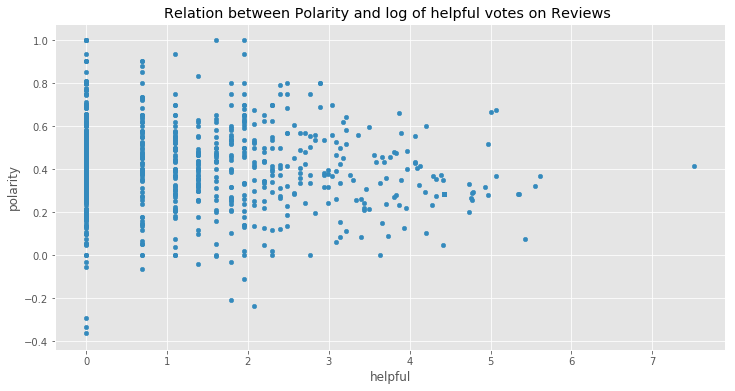

In [175]:
import numpy as np
filtered=sample.loc[sample['helpful']>0][['helpful','polarity']]
filtered['helpful'] = filtered['helpful'].map(lambda x: np.log(x))
filtered.plot.scatter('helpful', 'polarity')
plt.title('Relation between Polarity and log of helpful votes on Reviews ')


Text(0.5, 1.0, 'Relation between Polarity and log of unhelpful votes on Reviews ')

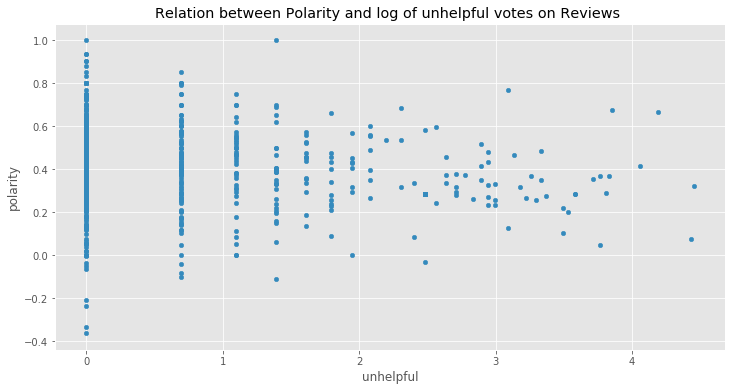

In [176]:
filtered = sample.loc[sample['unhelpful']>0][['unhelpful','polarity']]
filtered['unhelpful'] = filtered['unhelpful'].map(lambda x: np.log(x))
filtered.plot.scatter('unhelpful', 'polarity')
plt.title('Relation between Polarity and log of unhelpful votes on Reviews ')



### iPhone 6s plus


In [177]:
sample = iphone_6splus.apply(sentiment_func, axis=1)
sample.describe()

,helpful,rating,recommending,unhelpful,price,polarity,subjectivity
count,5584.000000,5584.000000,5584.000000,5584.000000,5.584000e+03,5584.000000,5584.000000
mean,2.215974,4.559097,0.832557,0.649713,4.999900e+02,0.373603,0.591688
std,19.024780,0.902610,0.373404,3.648069,4.940135e-11,0.247881,0.178177
min,0.000000,1.000000,0.000000,0.000000,4.999900e+02,-1.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,4.999900e+02,0.236172,0.500000
50%,0.000000,5.000000,1.000000,0.000000,4.999900e+02,0.380000,0.600000
75%,0.000000,5.000000,1.000000,0.000000,4.999900e+02,0.519048,0.700000
max,888.000000,5.000000,1.000000,126.000000,4.999900e+02,1.000000,1.000000


Text(0.5, 1.0, 'Relation between Polarity and log of helpful votes on Reviews ')

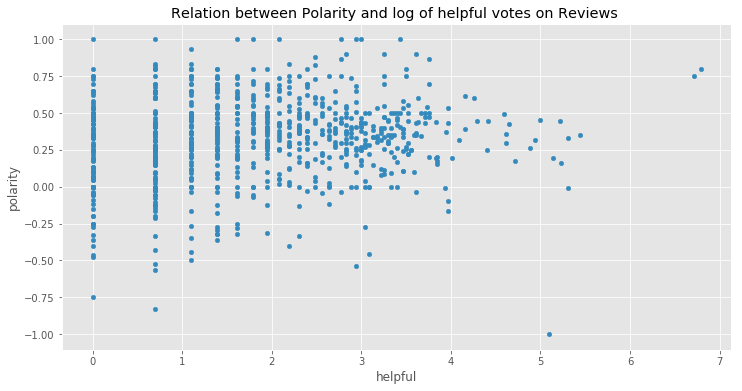

In [178]:

filtered=sample.loc[sample['helpful']>0][['helpful','polarity']]
filtered['helpful'] = filtered['helpful'].map(lambda x: np.log(x))
filtered.plot.scatter('helpful', 'polarity')
plt.title('Relation between Polarity and log of helpful votes on Reviews ')

Text(0.5, 1.0, 'Relation between Polarity and log of unhelpful votes on Reviews ')

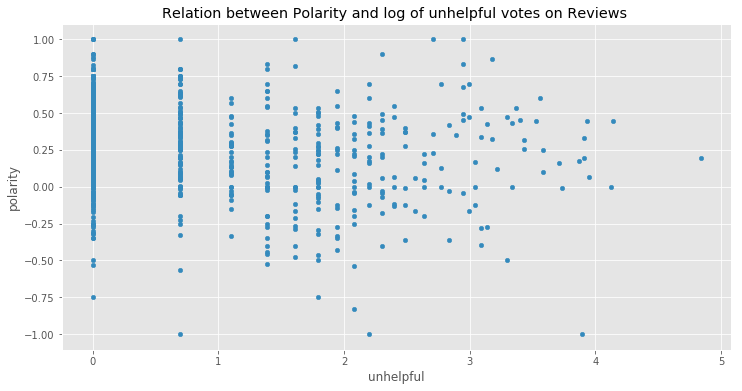

In [179]:
filtered = sample.loc[sample['unhelpful']>0][['unhelpful','polarity']]
filtered['unhelpful'] = filtered['unhelpful'].map(lambda x: np.log(x))
filtered.plot.scatter('unhelpful', 'polarity')
plt.title('Relation between Polarity and log of unhelpful votes on Reviews ')

In [180]:
sample = iphone_7.apply(sentiment_func, axis=1)
sample.describe()

,helpful,rating,recommending,unhelpful,price,polarity,subjectivity
count,6573.000000,6573.000000,6573.000000,6573.000000,6.573000e+03,6573.000000,6573.000000
mean,1.233683,4.627719,0.912673,0.342309,4.999900e+02,0.377542,0.627943
std,8.046985,0.483449,0.282335,2.586889,7.560750e-11,0.246446,0.160896
min,0.000000,4.000000,0.000000,0.000000,4.999900e+02,-0.800000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,4.999900e+02,0.238095,0.566667
50%,0.000000,5.000000,1.000000,0.000000,4.999900e+02,0.400000,0.643939
75%,0.000000,5.000000,1.000000,0.000000,4.999900e+02,0.500000,0.750000
max,232.000000,5.000000,1.000000,100.000000,4.999900e+02,1.000000,1.000000


Text(0.5, 1.0, 'Relation between Polarity and log of helpful votes on Reviews ')

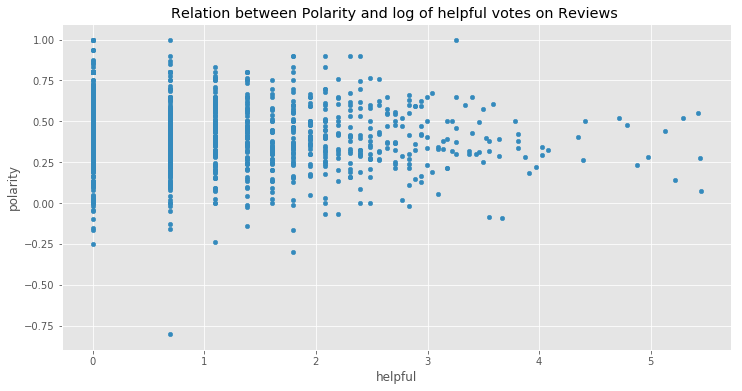

In [181]:
filtered=sample.loc[sample['helpful']>0][['helpful','polarity']]
filtered['helpful'] = filtered['helpful'].map(lambda x: np.log(x))
filtered.plot.scatter('helpful', 'polarity')
plt.title('Relation between Polarity and log of helpful votes on Reviews ')


Text(0.5, 1.0, 'Relation between Polarity and log of unhelpful votes on Reviews ')

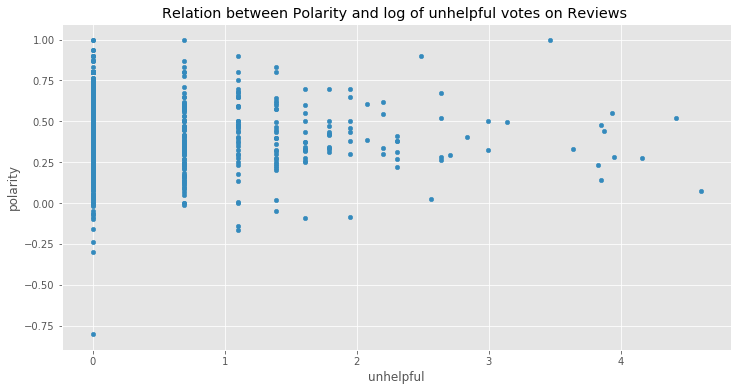

In [182]:
filtered = sample.loc[sample['unhelpful']>0][['unhelpful','polarity']]
filtered['unhelpful'] = filtered['unhelpful'].map(lambda x: np.log(x))
filtered.plot.scatter('unhelpful', 'polarity')
plt.title('Relation between Polarity and log of unhelpful votes on Reviews ')